## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


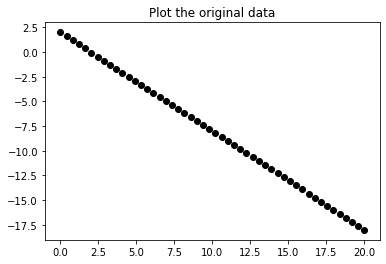

In [2]:
X=np.linspace(0,20,50)
y = -1 * X + 2

plt.scatter(X, y, color='black')
plt.gca().set_title("Plot the original data")

X =np.c_[np.ones(len(X),dtype='int64'),X] # adding X0

#### Plot your data points. 

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

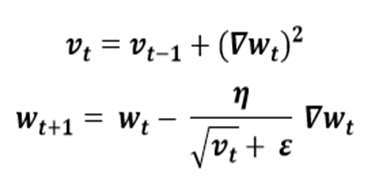

In [3]:
def cost_function(X, Y, Th): # Mean Squared Error
    m = len(Y)
    j = np.sum((X.dot(Th) - Y) ** 2)/(2 * m)
    return j

In [4]:
def Adagrad(X,y,th=np.array([0,0]), epochs=1000, learning_rate=0.5,epslion=1e-8):
    vt = np.array([0,0])
    count = 0
    cost_history = []
    m = len(y)
    th0=[0]
    th1=[0]
    
#     print(X.shape)
    cost = cost_function(X, y, th)
    cost_history.append( cost)
    
    for i in range(epochs):
        h = X.dot(th) #50*1
#         print(h.shape)
        loss = h - y # 50*1
#         print(loss.shape)
        gradient = X.T.dot(loss) / m # 2*50 . 50*1 = 2*1
#         print(gradient.shape)
        vt = vt + gradient**2 # 2*1
#         print(vt.shape)
        th = th - (learning_rate * gradient )/(np.sqrt(vt)+epslion) #2*1
#         print(th.shape)
        cost = cost_function(X, y, th)
        cost_history.append( cost)
        
        th0.append(th[0])
        th1.append(th[1])
        
        plt.plot(X[:,1], h)   
        
        count += 1
        if abs(cost_history[i+1]-cost_history[i]) < 0.0001:
            print("Nomber of Iterations:",count)
            print("accuracy: " ,r2_score(y,h) * 100 ,"%")
            plt.show()
            return  cost_history, th0, th1, h
        
    print("accuracy: " ,r2_score(y,h) * 100 ,"%")
    print("that not the best, please increase the epochs")
    plt.show()
    return cost_history, th0, th1, h
    

Nomber of Iterations: 213
accuracy:  99.97790043228377 %


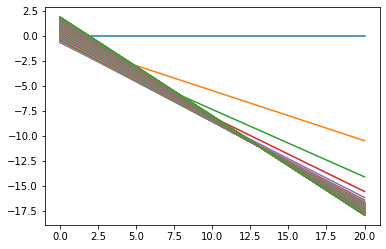

In [5]:
loss1, theta1_0, theta1_1, h1 = Adagrad(X,y)

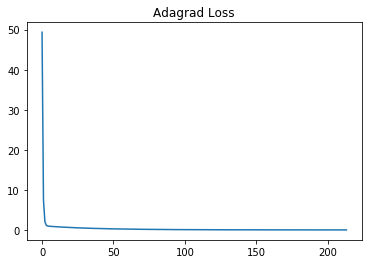

In [6]:
plt.plot(loss1)
plt.title("Adagrad Loss")
plt.show()

Text(0.5, 1.0, 'theta_0')

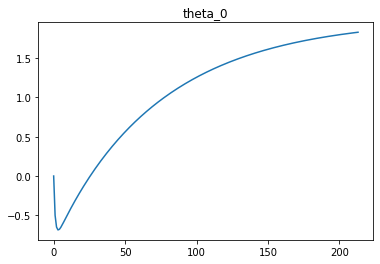

In [7]:
plt.plot(theta1_0)
plt.gca().set_title("theta_0")

Text(0.5, 1.0, 'theta_1')

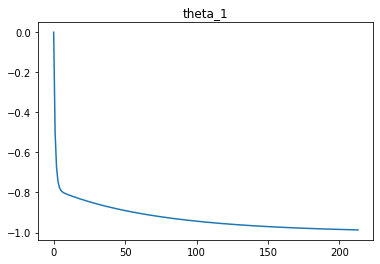

In [8]:
plt.plot(theta1_1)
plt.gca().set_title("theta_1")

Text(0.5, 1.0, 'loss with theta_0')

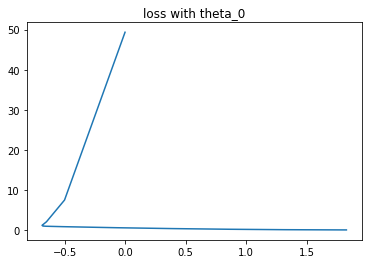

In [9]:
plt.plot(theta1_0,loss1)
plt.gca().set_title("loss with theta_0")

Text(0.5, 1.0, 'loss with theta_1')

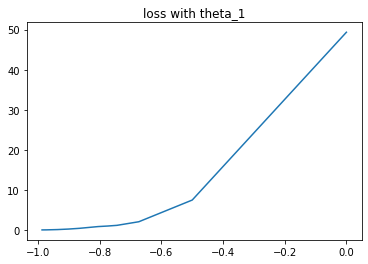

In [10]:
plt.plot(theta1_1,loss1)
plt.gca().set_title("loss with theta_1")

Text(0.5, 1.0, 'Adagrad')

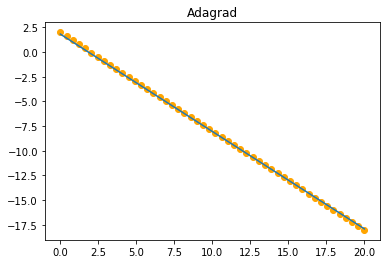

In [11]:
plt.scatter(X[:,1], y, color='orange')
plt.plot(X[:,1], h1) # y = theta0 + theta1*x
plt.gca().set_title("Adagrad")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

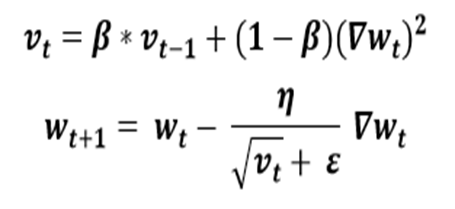

In [12]:
def RMSProp(X,y,th=np.array([0,0]), epochs=10000, learning_rate=0.1, beta=0.9, epslion=1e-8):
    vt = np.array([0,0])
    count = 0
    cost_history = []
    m = len(y)
    th0=[0]
    th1=[0]
    cost = cost_function(X, y, th)
    cost_history.append( cost)
    
    for i in range(epochs):
        h = X.dot(th) #50*1
#         print(h.shape)
        loss = h - y # 50*1
#         print(loss.shape)
        gradient = X.T.dot(loss) / m # 2*50 . 50*1 = 2*1
#         print(gradient.shape)
        vt = beta*vt + (1-beta)*gradient**2 # 2*1
#         print(vt.shape)
        th = th - (learning_rate * gradient )/(np.sqrt(vt)+epslion) #2*1
#         print(th.shape)
        cost = cost_function(X, y, th)
        cost_history.append( cost)
        
        th0.append(th[0])
        th1.append(th[1])
        
        plt.plot(X[:,1], h)
        
        count += 1
        if abs(cost_history[i+1]-cost_history[i]) < 0.0001:
            print("Nomber of Iterations:",count)
            print("accuracy: " ,r2_score(y,h) * 100 ,"%")
            plt.show()
            return  cost_history, th0, th1, h
        
    print("accuracy: " ,r2_score(y,h) * 100 ,"%")
    print("that not the best, please increase the epochs")
    plt.show()
    return cost_history, th0, th1, h
    
    

Nomber of Iterations: 77
accuracy:  99.988451294217 %


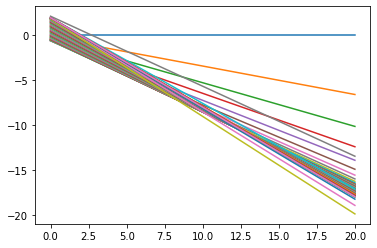

In [48]:
loss2, theta2_0, theta2_1, h2 = RMSProp(X,y)

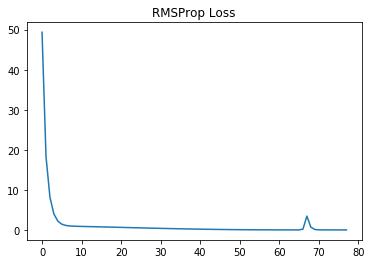

In [15]:
plt.plot(loss2)
plt.title("RMSProp Loss")
plt.show()

Text(0.5, 1.0, 'loss with theta_0')

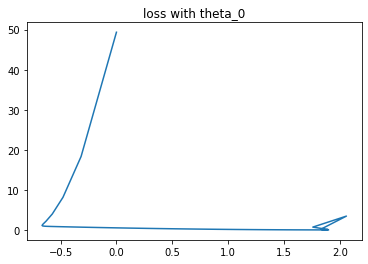

In [49]:
plt.plot(theta2_0,loss2)
plt.gca().set_title("loss with theta_0")

Text(0.5, 1.0, 'loss with theta_1')

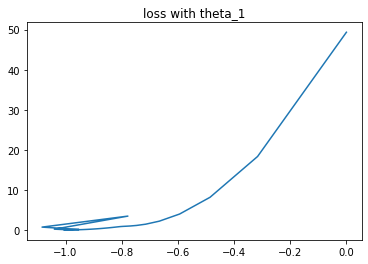

In [51]:
plt.plot(theta2_1,loss2)
plt.gca().set_title("loss with theta_1")

Text(0.5, 1.0, 'RMSProp')

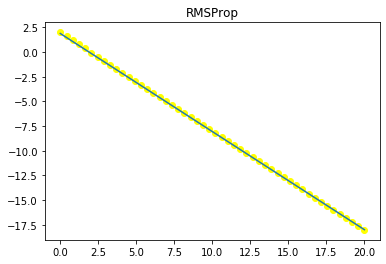

In [54]:
plt.scatter(X[:,1], y, color='yellow')
plt.plot(X[:,1], h2) # y = theta0 + theta1*x
plt.gca().set_title("RMSProp")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

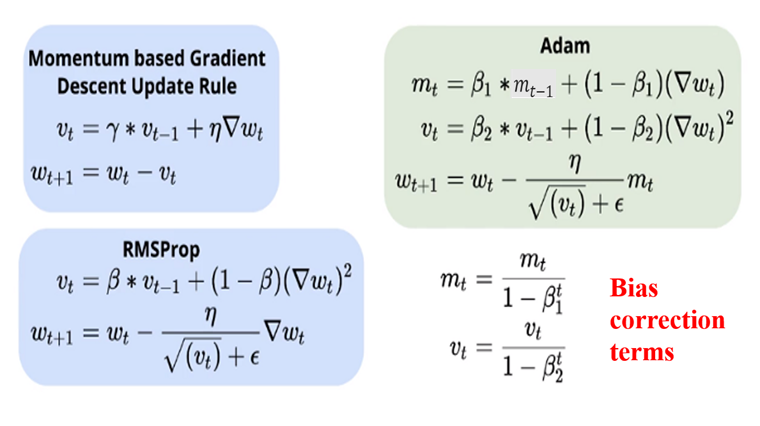

In [13]:
def Adam(X,y,th=np.array([0,0]), epochs=10000, learning_rate=0.05, beta1=0.5, beta2=0.9, epslion=1e-8):
    vt = np.array([0,0])
    mt = np.array([0,0])
    count = 0
    cost_history = []
    m = len(y)
    th0=[0]
    th1=[0]
    cost = cost_function(X, y, th)
    cost_history.append( cost)
    
    for i in range(epochs):
        h = X.dot(th) #50*1
#         print(h.shape)
        loss = h - y # 50*1
#         print(loss.shape)
        gradient = X.T.dot(loss) / m # 2*50 . 50*1 = 2*1
#         print(gradient.shape)
        mt = beta1*mt + (1-beta1)*gradient # 2*1
        mt = mt/(1-beta1**(i+1)) # bais correction
#         print(mt.shape)
        vt = beta2*vt + (1-beta2)*gradient**2 # 2*1
        vt = vt/(1-beta2**(i+1)) # bais correction
#         print(vt.shape)
        th = th - (learning_rate * mt )/(np.sqrt(vt)+epslion) #2*1
#         print(th.shape)
        cost = cost_function(X, y, th)
        cost_history.append( cost)
        
        th0.append(th[0])
        th1.append(th[1])
        
        plt.plot(X[:,1], h)
        
        count += 1
        if abs(cost_history[i+1]-cost_history[i]) < 0.00001:
            print("Nomber of Iterations:",count)
            print("accuracy: " ,r2_score(y,h) * 100 ,"%")
            plt.show()
            return  cost_history, th0, th1, h
        
    print("accuracy: " ,r2_score(y,h) * 100 ,"%")
    print("that not the best, please increase the epochs")
    plt.show()
    return cost_history, th0, th1, h
    
    #### It gives me error with bais correction

Nomber of Iterations: 238
accuracy:  99.99956783605352 %


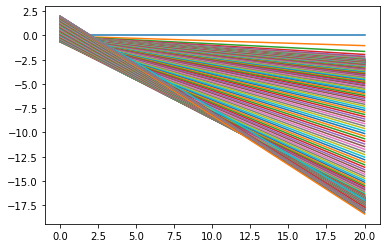

In [14]:
loss3, theta3_0, theta3_1, h3 = Adam(X,y)

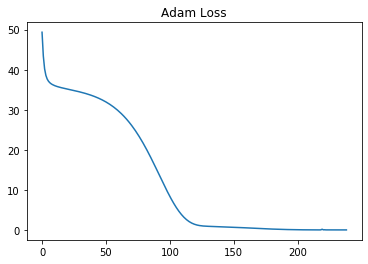

In [15]:
plt.plot(loss3)
plt.title("Adam Loss")
plt.show()

Text(0.5, 1.0, 'loss with theta_0')

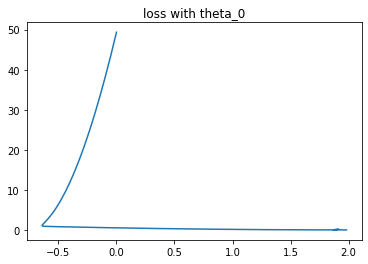

In [17]:
plt.plot(theta3_0,loss3)
plt.gca().set_title("loss with theta_0")

Text(0.5, 1.0, 'loss with theta_1')

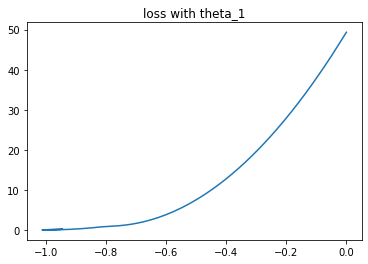

In [18]:
plt.plot(theta3_1,loss3)
plt.gca().set_title("loss with theta_1")

Text(0.5, 1.0, 'Adam')

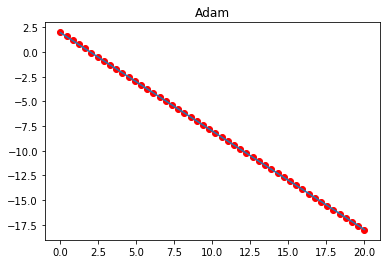

In [19]:
plt.scatter(X[:,1], y, color='red')
plt.plot(X[:,1], h3) # y = theta0 + theta1*x
plt.gca().set_title("Adam")

In [ ]:
#comparison when learning rate = 0.01 and beta of v = 0.9

Adagrad
accuracy:  59.70730897370906 %
that not the best, please increase the epochs


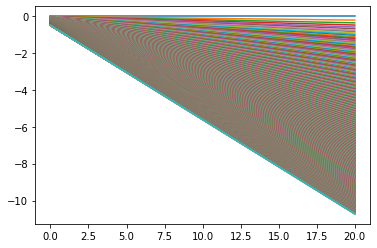

RMSProp
Nomber of Iterations: 384
accuracy:  99.98047959964823 %


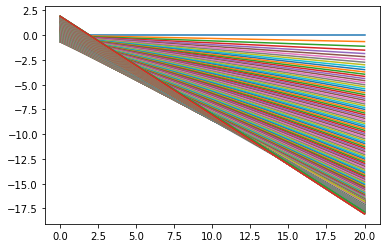

Adam
Nomber of Iterations: 494
accuracy:  99.99942413757583 %


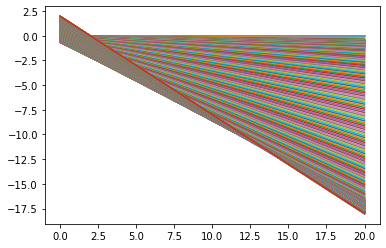

In [20]:
print("Adagrad")
loss1, theta1_0, theta1_1, h1 = Adagrad(X,y,th=np.array([0,0]), epochs=1000, learning_rate=0.01)
print("RMSProp")
loss2, theta2_0, theta2_1, h2 = RMSProp(X,y,th=np.array([0,0]), epochs=1000, learning_rate=0.01, beta=0.9)
print("Adam")
loss3, theta3_0, theta3_1, h3 = Adam(X,y,th=np.array([0,0]), epochs=10000, learning_rate=0.01, beta1=0.5, beta2=0.9)


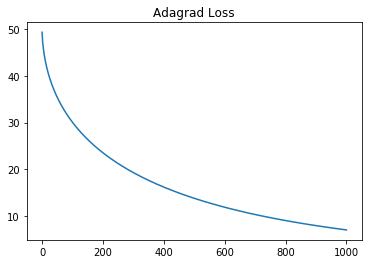

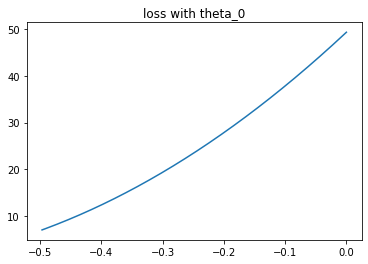

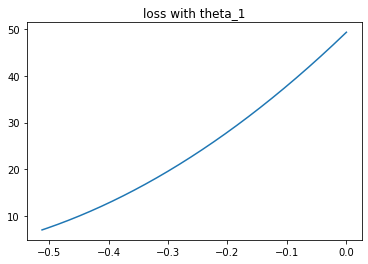

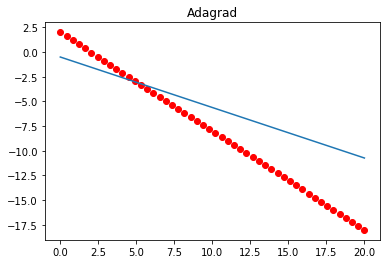

In [75]:
#Adagrad
plt.plot(loss1)
plt.title("Adagrad Loss")
plt.show()
plt.plot(theta1_0,loss1)
plt.gca().set_title("loss with theta_0")
plt.show()
plt.plot(theta1_1,loss1)
plt.gca().set_title("loss with theta_1")
plt.show()
plt.scatter(X[:,1], y, color='red')
plt.plot(X[:,1], h1) # y = theta0 + theta1*x
plt.gca().set_title("Adagrad")
plt.show()


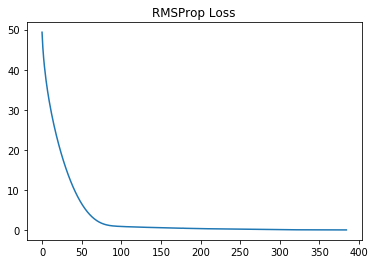

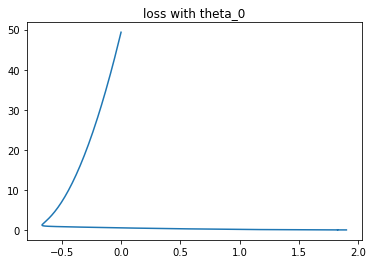

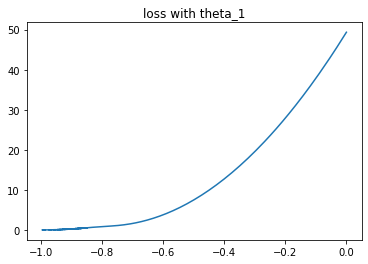

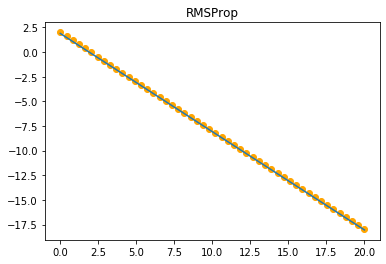

In [76]:
# RMSProp
plt.plot(loss2)
plt.title("RMSProp Loss")
plt.show()
plt.plot(theta2_0,loss2)
plt.gca().set_title("loss with theta_0")
plt.show()
plt.plot(theta2_1,loss2)
plt.gca().set_title("loss with theta_1")
plt.show()
plt.scatter(X[:,1], y, color='orange')
plt.plot(X[:,1], h2) # y = theta0 + theta1*x
plt.gca().set_title("RMSProp")
plt.show()




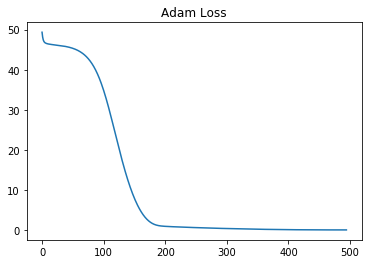

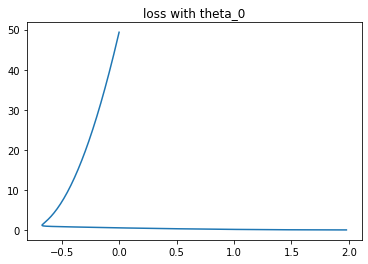

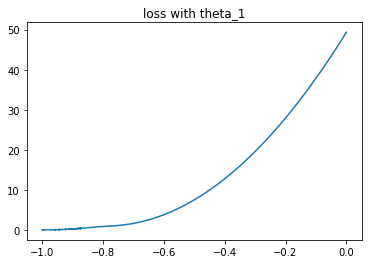

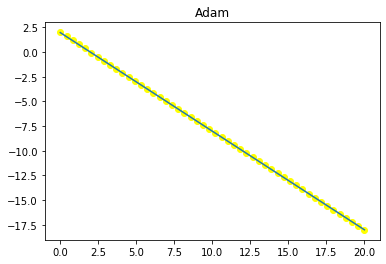

In [21]:
# Adam
plt.plot(loss3)
plt.title("Adam Loss")
plt.show()
plt.plot(theta3_0,loss3)
plt.gca().set_title("loss with theta_0")
plt.show()
plt.plot(theta3_1,loss3)
plt.gca().set_title("loss with theta_1")
plt.show()
plt.scatter(X[:,1], y, color='yellow')
plt.plot(X[:,1], h3) # y = theta0 + theta1*x
plt.gca().set_title("Adam")
plt.show()

## Congratulations 
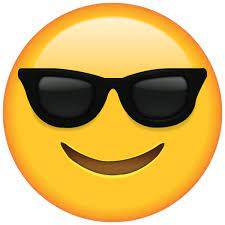